In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

tf.random.set_seed(0)

In [22]:
train_X = np.array([[1., 2.], [2., 3.], [3., 1.], [4., 3.], [5., 3.], [6., 2.]], dtype=np.float32)
train_y = np.array([[0.], [0.], [0.], [1.], [1.], [1.]], dtype=np.float32)

test_X = np.array([[5., 2.]], dtype=np.float32)
test_y = np.array([[1.]], dtype=np.float32)

x1 = [x[0] for x in train_X]
x2 = [x[1] for x in train_X]

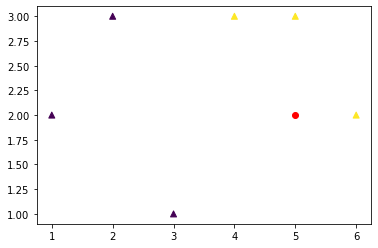

In [23]:
colors = [x[0] for x in train_y]
ax = plt.scatter(x = x1, y = x2, c = colors, marker = "^")
ax = plt.scatter(x = [x[0] for x in test_X], y = [x[1] for x in test_X], c="red")

In [24]:
dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y)).batch(len(train_X))

W = tf.Variable(tf.zeros([2, 1]), name = "weight")
b = tf.Variable(tf.zeros([1]), name = "bias")

def hyp(features):
    h = 1 / (1 + tf.exp(- tf.matmul(features, W) + b))
    return h

def loss_func(features, labels):
    h = hyp(features)
    loss = - tf.reduce_mean(labels * tf.math.log(h) + (1 - labels) * tf.math.log(1 - h))
    return loss

def grad(features, labels):
    with tf.GradientTape() as tape:
        loss = loss_func(features, labels)
        return tape.gradient(loss, [W, b])

def acc_func(features, labels):
    h = hyp(features)
    pred = tf.cast(h > 0.5, dtype=tf.float32)
    acc = tf.reduce_mean(tf.cast(tf.equal(pred, labels), dtype=tf.float32))
    return acc

In [26]:
n_epochs = 1000
for step in range(n_epochs):
    for features, labels in iter(dataset):
        h = hyp(features)
        dW, db = grad(features, labels)
        optimizer = tf.keras.optimizers.SGD(lr=0.01)
        optimizer.apply_gradients(zip([dW, db], [W, b]))
        print("{:>4d} | {:6.4f}".format(step+1, loss_func(features, labels).numpy()))

   1 | 0.6821
   2 | 0.6773
   3 | 0.6729
   4 | 0.6689
   5 | 0.6652
   6 | 0.6618
   7 | 0.6587
   8 | 0.6558
   9 | 0.6532
  10 | 0.6507
  11 | 0.6484
  12 | 0.6463
  13 | 0.6443
  14 | 0.6424
  15 | 0.6406
  16 | 0.6389
  17 | 0.6374
  18 | 0.6359
  19 | 0.6345
  20 | 0.6331
  21 | 0.6319
  22 | 0.6306
  23 | 0.6295
  24 | 0.6283
  25 | 0.6272
  26 | 0.6262
  27 | 0.6252
  28 | 0.6242
  29 | 0.6232
  30 | 0.6223
  31 | 0.6214
  32 | 0.6205
  33 | 0.6196
  34 | 0.6188
  35 | 0.6180
  36 | 0.6172
  37 | 0.6164
  38 | 0.6156
  39 | 0.6148
  40 | 0.6140
  41 | 0.6133
  42 | 0.6125
  43 | 0.6118
  44 | 0.6111
  45 | 0.6104
  46 | 0.6097
  47 | 0.6090
  48 | 0.6083
  49 | 0.6076
  50 | 0.6069
  51 | 0.6062
  52 | 0.6056
  53 | 0.6049
  54 | 0.6042
  55 | 0.6036
  56 | 0.6029
  57 | 0.6023
  58 | 0.6017
  59 | 0.6010
  60 | 0.6004
  61 | 0.5998
  62 | 0.5991
  63 | 0.5985
  64 | 0.5979
  65 | 0.5973
  66 | 0.5967
  67 | 0.5961
  68 | 0.5955
  69 | 0.5949
  70 | 0.5943
  71 | 0.5937
  72 |

 589 | 0.4549
 590 | 0.4548
 591 | 0.4547
 592 | 0.4546
 593 | 0.4544
 594 | 0.4543
 595 | 0.4542
 596 | 0.4540
 597 | 0.4539
 598 | 0.4538
 599 | 0.4537
 600 | 0.4535
 601 | 0.4534
 602 | 0.4533
 603 | 0.4532
 604 | 0.4531
 605 | 0.4529
 606 | 0.4528
 607 | 0.4527
 608 | 0.4526
 609 | 0.4524
 610 | 0.4523
 611 | 0.4522
 612 | 0.4521
 613 | 0.4520
 614 | 0.4518
 615 | 0.4517
 616 | 0.4516
 617 | 0.4515
 618 | 0.4513
 619 | 0.4512
 620 | 0.4511
 621 | 0.4510
 622 | 0.4509
 623 | 0.4507
 624 | 0.4506
 625 | 0.4505
 626 | 0.4504
 627 | 0.4503
 628 | 0.4501
 629 | 0.4500
 630 | 0.4499
 631 | 0.4498
 632 | 0.4497
 633 | 0.4496
 634 | 0.4494
 635 | 0.4493
 636 | 0.4492
 637 | 0.4491
 638 | 0.4490
 639 | 0.4489
 640 | 0.4487
 641 | 0.4486
 642 | 0.4485
 643 | 0.4484
 644 | 0.4483
 645 | 0.4482
 646 | 0.4480
 647 | 0.4479
 648 | 0.4478
 649 | 0.4477
 650 | 0.4476
 651 | 0.4475
 652 | 0.4473
 653 | 0.4472
 654 | 0.4471
 655 | 0.4470
 656 | 0.4469
 657 | 0.4468
 658 | 0.4467
 659 | 0.4465
 660 |

In [27]:
print("test_acc : {}".format(acc_func(test_X, test_y).numpy()))

test_acc : 1.0
